In [60]:
# restructure (change the file structure and rename the xml files) Peters cohort to precosess it the same way as the GCN data
# define logging and working directory
from ProjectRoot import change_wd_to_project_root 
change_wd_to_project_root()
from pyforest import *
from src.utils.notebook_imports import *


search for root_dir and set working directory
Working directory set to: /mnt/data/git/cardio


In [61]:
# define a helper copy function
def copy_files(files, destination_path):
    """
    Copy a list of file paths to a destination path
    files: list of full file paths as strings
    destination_path: root destination folder as string
    """
    import shutil
    logging.info('Start to copy: {} files'.format(len(files)))
    # ensure directory exist
    ensure_dir(destination_path)

    for file in files:
        logging.info('copy file: {} to {}'.format(file, destination_path))
        shutil.copy2(file, destination_path)

# Dicom reconstruction for TOFExport folder

In [62]:
def extract_patient(p, export_root):
    """
    process one patient from peters raw data structue,
    copy files into a new structure
    the new structure is very flat:
    
    patient-identifier
    - xml-files
    - folder with the same name as the xml-file basename
        - dicom files
    """
    import shutil
    
    try:
        # define the patient specific export root folder
        patient_export_root = os.path.join(export_root, os.path.basename(os.path.dirname(p)))
        ensure_dir(patient_export_root)

        # get the xml files
        xml_root = os.path.join(p, 'segmentation', '*.cvi42wsx')
        print(xml_root)
        xml_files = sorted(glob.glob(xml_root))
        assert(len(xml_files) >= 1)
        xml_basename = os.path.splitext(os.path.basename(xml_files[0]))[0]
        print(xml_basename)


        # get the dicom files
        dicom_files = sorted(glob.glob(os.path.join(p, '**/**/**/*.dcm')))
        assert(len(dicom_files) >= 1)
        dicom_export_path = os.path.join(patient_export_root, xml_basename)

        # copy xml file
        #new_xml_file = os.path.join(c, xml_basename + '.cvi42wsx')
        #print(new_xml_file)
        copy_files(xml_files, patient_export_root)
        # copy dicom images
        copy_files(dicom_files, dicom_export_path)
        
        # rename the xml file to make sure it is treated as short axis contour
        new_xml_f_ = os.path.join(patient_export_root, xml_basename + '.cvi42wsx')
        new_xml_f = os.path.join(patient_export_root, 'SAX_' + xml_basename + '.cvi42wsx')
        print(new_xml_f_)
        print(new_xml_f)
        os.rename(new_xml_f_, new_xml_f)
    except Exception as e:
        logging.error("failed to extract patient: {} - {}".format(p, str(e)))

In [4]:
# get all patients
#patients = sorted(glob.glob("/mnt/data/datasets/cardio/Peter_data_responder/TOFexport/Data/**/"))
# new folder von peter
patients = sorted(glob.glob("/mnt/data/datasets/cardio/peter/Peter_data_responder/TOFexport/Data/**/"))
# filter the template folder
patients = [p for p in patients if 'Template' not in p]

export_root = 'data/interim/peters_cohort_2'
ensure_dir(export_root)

In [6]:
patients

['/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/AS/P1_post - TOF02/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/AS/P1_pre - TOF02/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/CS/P1_post - TOF18/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/CS/P1_pre - TOF18/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/EO/P1_post - TOF11/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/EO/P1_pre - TOF11/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/HP/P1_post - TOF12/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/HP/P1_pre - TOF12/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/LB/P1_post - TOF03/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/LB/P1_pre - TOF03/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/MT/P1_post - TOF09/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/MT/P1_pre - TOF09/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/SA/P1_post - TOF13/',
 '/mnt/data/datase

In [7]:
# copy and rename the patients - Folder
sucess = [extract_patient(p, export_root) for p in patients]
    

/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/AS/P1_post - TOF02/segmentation/*.cvi42wsx
failed to extract patient: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/AS/P1_post - TOF02/ - 
/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/AS/P1_pre - TOF02/segmentation/*.cvi42wsx
failed to extract patient: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/AS/P1_pre - TOF02/ - 
/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/CS/P1_post - TOF18/segmentation/*.cvi42wsx
failed to extract patient: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/CS/P1_post - TOF18/ - 
/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/CS/P1_pre - TOF18/segmentation/*.cvi42wsx
failed to extract patient: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/CS/P1_pre - TOF18/ - 
/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/EO/P1_post - TOF11/segmentation/*.cvi42wsx
failed to extract patient: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/EO/P1_post - TOF11/ - 
/mnt/data/datasets/

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# New folders from Peter (Raw_dicom_plus_segm), no circle files to reshape and stack the dicoms


This folder contains data from Universitätsspital Zürich (Barbara Burkhardt) and Childrens Health, UTSW Medical Center Dallas (Tarique Hussain). 
Segmentations were created by Peter Full and Barbara Burkhardt.

Data was merged from the following directories:
- /media/full/Elements/Peter/2016_MRT_Myokard_Dallas (Full)/DataMRI/TOF_Zuerich_images_and_segmentations/AtlasData_RV (vtk-segmentation files for LV, LVM, RV) and
- /media/full/Elements/Peter/2016_MRT_Myokard_Dallas (Full)/DataMRI/TOF_Zuerich_raw (raw dicom files for all TOF patients)

each TOF patient (10 cases) has a pre- and a postoperative sequence. You will find them in the according subdirectories.

In [8]:
import SimpleITK as sitk
from src.visualization.Visualize import show_2D_or_3D
import src.data.Dataset as data
import pandas as pd

Using TensorFlow backend.


In [21]:
def get_timesteps(dicom_images):
    """
    calculate the timesteps of one volume by summing up the origins
    all slices with the same origin represent the timesteps of one slice
    """

    origins = [img.GetOrigin() for idx, img in enumerate(dicom_images)]
    counter = Counter(origins)
    steps = counter[next(iter(counter))]
    return steps

In [58]:
def read_folder_with_dicom_series(p, suffix='.dcm', z=10, t=25):
    """
    Reads all dicom files, stack, reshape according to z and t
    copy spacing
    """
    path_ = '{}MRI/*{}'.format(p, suffix)
    files = sorted(glob.glob(path_))
    
    # if no files found, search in sub-dirs, at least one folder has sub-directories
    if len(files) == 0:
        path_ = '{}MRI/**/*{}'.format(p, suffix)
        files = sorted(glob.glob(path_))
    # one folder has multiple sub-folders
    if len(files) >500: 
        path_ = '{}MRI/Multi slice SSFP - 2501/*{}'.format(p, suffix)
        files = sorted(glob.glob(path_))
    assert len(files)> 0, 'no dicom images found for: {}'.format(path_)
    print('found: {} files for path: {}'.format(len(files), path_))
    images = [sitk.ReadImage(f) for f in files]
    meta_data_repr = images[0]
    ndas = [sitk.GetArrayFromImage(i).astype(np.uint16) for i in images]
    spacings_sitk = [s.GetSpacing() for s in images]
    size = meta_data_repr.GetSize()

    nda = np.stack(ndas)
    t = get_timesteps(images)
    # calc z by t, we asume that we can predict the timesteps by the image origin
    z = len(files) // t
    print('t: {}'.format(t))
    print('z: {}'.format(z))
    slice_shape = nda.shape[-2:]
    nda = np.reshape(nda, (z, t,*(slice_shape)))
    nda = np.swapaxes(nda, 0,1)
    img = sitk.JoinSeries([sitk.GetImageFromArray(vol) for vol in nda])
    img.SetSpacing((*spacings_sitk[0],1))
    for tag in meta_data_repr.GetMetaDataKeys():
        value = data.get_metadata_maybe(meta_data_repr, tag)
        img.SetMetaData(tag, value)
    return img

In [48]:
def create_4D_volumes_from_peters_raw_dicom(import_root, export_root='data/raw/peter_raw'):
    
    """
    Reconstruct the 4D dicom volumes from the raw pre/post PVR data structure
    Saves the 4D volumes as nrrd files into a flat structure (export_root)
    """
    
    ensure_dir(export_root)
    
    assert os.path.exists(import_root)
    
    # get all patient folders
    patients = sorted(glob.glob(os.path.join(import_root, "**/**/")))
    
    print('found: {} 4d volumes'.format(len(patients)))
    
    # create 4D volumes and filenames which represents the folder structure
    volumes_sitk = [read_folder_with_dicom_series(p) for p in patients]
    print(len(volumes_sitk))
    
    new_f_names = ['__'.join(p.split('/')[-3:-1]) + '.nrrd' for p in patients]
    print(len(new_f_names))
    # save 4D volumes to export dir + flat_filename
    success = [sitk.WriteImage(img, os.path.join(export_root, f_name)) for img, f_name in zip(volumes_sitk, new_f_names)]
    return success


In [47]:
# Get all patient folder, define the new file names
import_root='/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/'
patients = sorted(glob.glob(os.path.join(import_root, "**/**/")))
['__'.join(patients[0].split('/')[-3:-1]) + '.nrrd' for p in patients]

['AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd',
 'AS__P1_post - TOF02.nrrd']

In [35]:
patients

['/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/AS/P1_post - TOF02/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/AS/P1_pre - TOF02/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/CS/P1_post - TOF18/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/CS/P1_pre - TOF18/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/EO/P1_post - TOF11/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/EO/P1_pre - TOF11/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/HP/P1_post - TOF12/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/HP/P1_pre - TOF12/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/LB/P1_post - TOF03/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/LB/P1_pre - TOF03/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/MT/P1_post - TOF09/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/MT/P1_pre - TOF09/',
 '/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/SA/P1_post - TOF13/',
 '/mnt/data/datase

In [59]:
# run the dicom series to 4D nrrd volume transformation
temp = create_4D_volumes_from_peters_raw_dicom(import_root='/mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/',
                                        export_root='data/raw/peters_new_uint16/4D')

found: 20 4d volumes
found: 250 files for path: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/AS/P1_post - TOF02/MRI/*.dcm
t: 25
z: 10
found: 420 files for path: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/AS/P1_pre - TOF02/MRI/**/*.dcm
t: 30
z: 14
found: 390 files for path: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/CS/P1_post - TOF18/MRI/*.dcm
t: 30
z: 13
found: 390 files for path: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/CS/P1_pre - TOF18/MRI/*.dcm
t: 30
z: 13
found: 275 files for path: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/EO/P1_post - TOF11/MRI/*.dcm
t: 25
z: 11
found: 420 files for path: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/EO/P1_pre - TOF11/MRI/*.dcm
t: 30
z: 14
found: 330 files for path: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/HP/P1_post - TOF12/MRI/*.dcm
t: 30
z: 11
found: 300 files for path: /mnt/data/datasets/cardio/peter/Raw_dicom_plus_segm/HP/P1_pre - TOF12/MRI/*.dcm
t: 25
z: 12
found: 390 files for

# Reading tests of the pre/post dicom data

Idea 1: Use the series reader to load all files of one series, the ordering of the files was wrong
Idea 2: use the filenames to sort the files, stack and reshape with numpy, we need to swap the t/z axis.

Some patient folders can not be stacked (resolutions does not fit), need to check.

Hi Peter,

thanks for your support!

With Tariques help we managed to identify the wrong files which were included in the dicom directory. The reconstruction worked afterwards, first validations looks good. :)

The sub-folder: Multi slice SSFP - 2501 (361) included a dicom file with 40 mb, which is not part of the SA stack.

Do we have cvi42wsx contours for one of the two phases to calculate 3D metrics for the predictions?

Bests,

Sven

In [51]:
# tests on a single patient folder
p = patients[0]
reader = sitk.ImageSeriesReader()

dicom_names = reader.GetGDCMSeriesFileNames(p + '/MRI/')
reader.SetFileNames(dicom_names)

image = reader.Execute()

size = image.GetSize()
print( "Image size:", size[0], size[1], size[2] )

Image size: 256 256 250


In [52]:
image.GetSpacing()

(1.4453125, 1.4453125, 1.0)

In [53]:
nda = sitk.GetArrayFromImage(image)

In [54]:
data.describe_sitk(image)

In [56]:
nda.shape
nda_4d = np.reshape(nda, (10, 25, 256, 256))
nda_4d.shape
nda_4d = np.swapaxes(nda_4d, 0,1)
nda_4d.shape

(25, 10, 256, 256)

/home/sven/anaconda3/envs/tf2/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


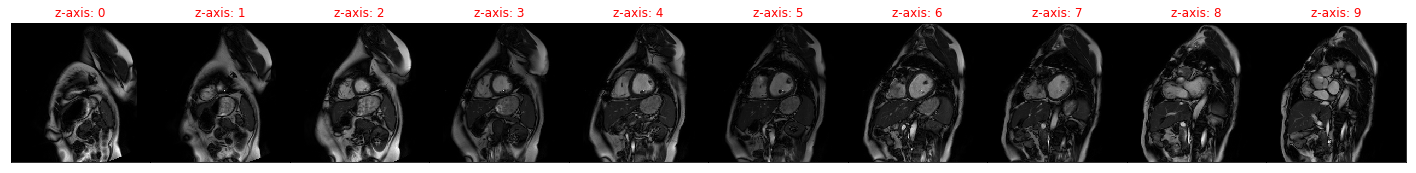

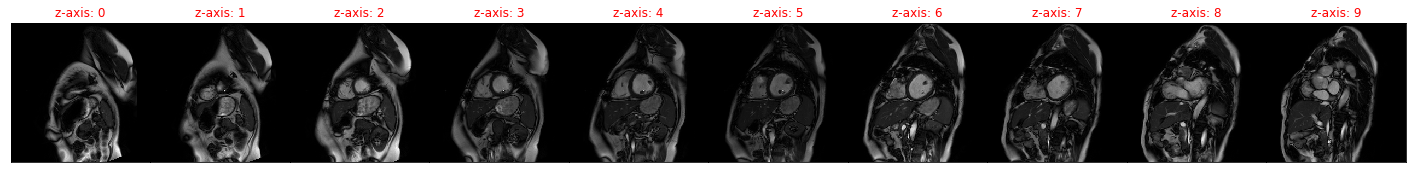

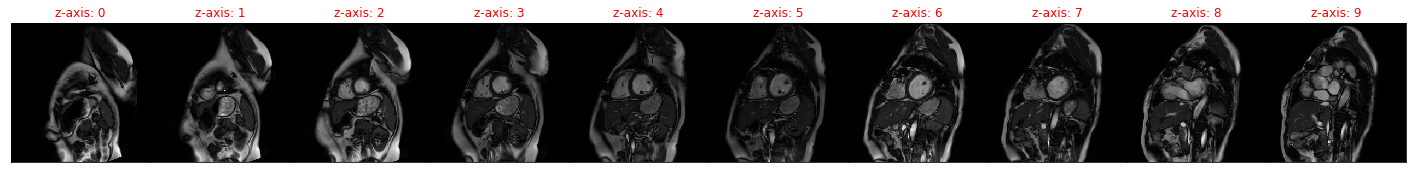

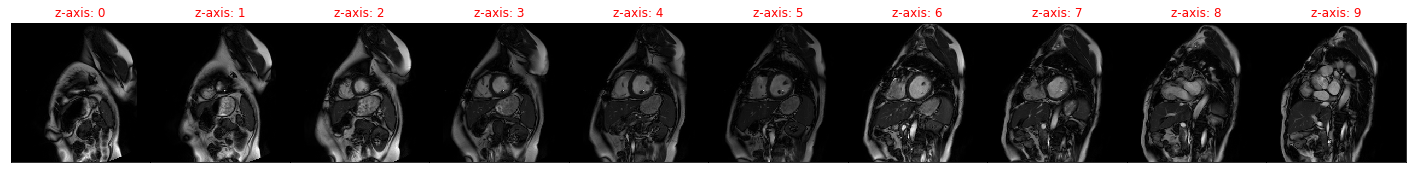

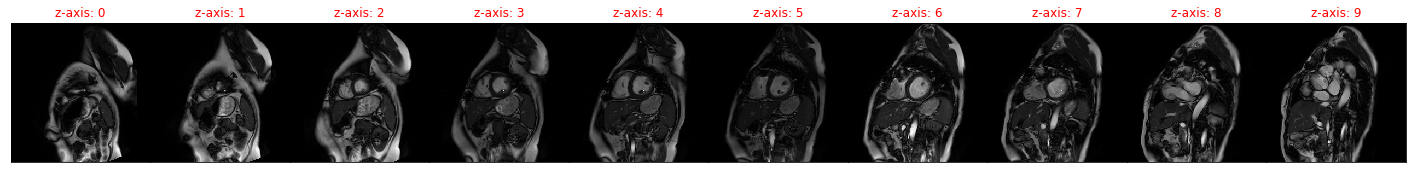

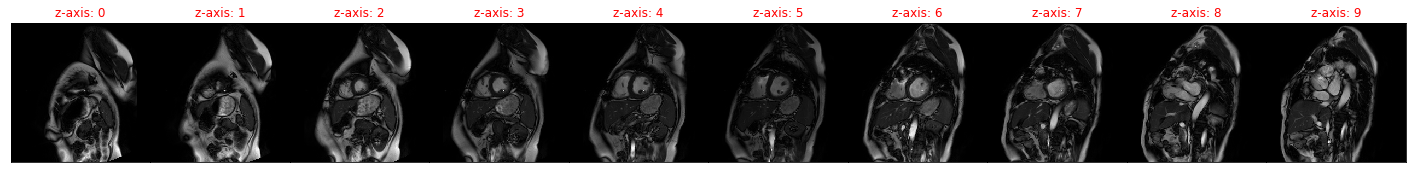

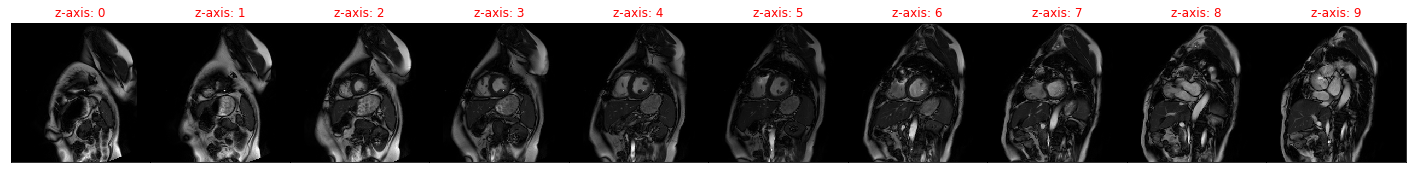

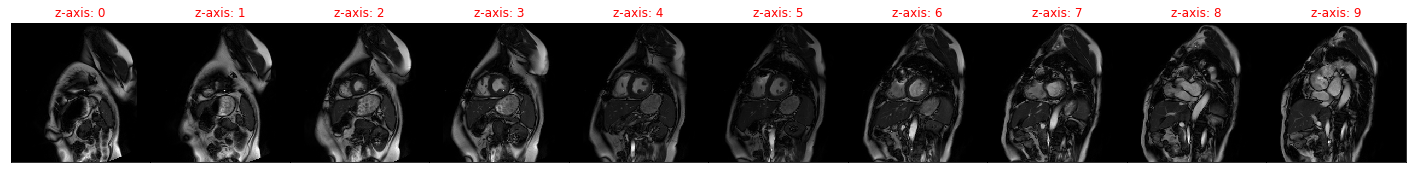

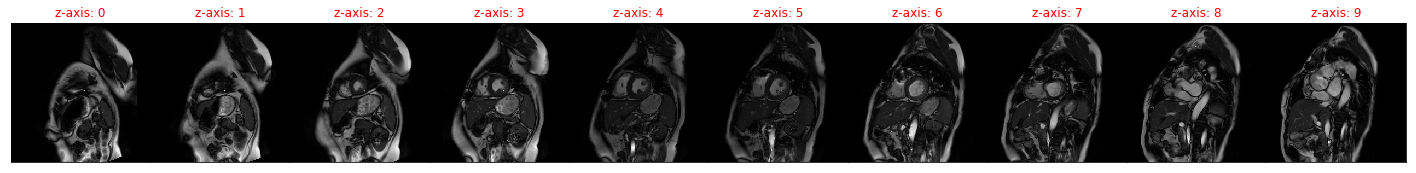

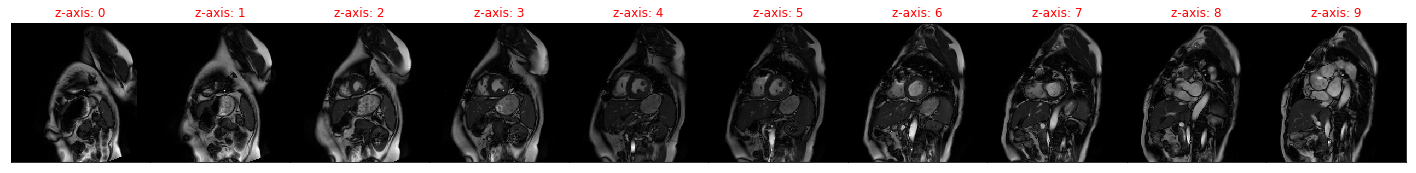

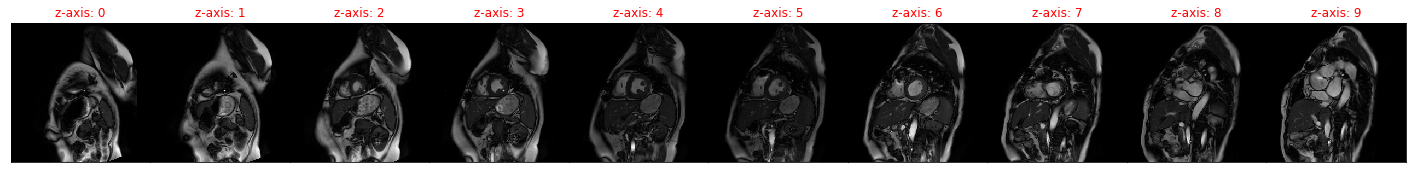

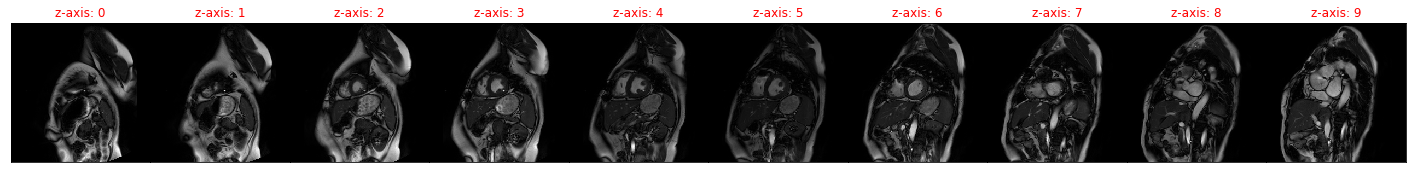

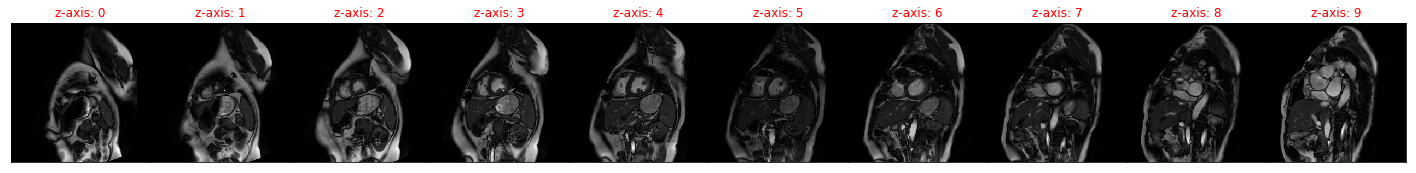

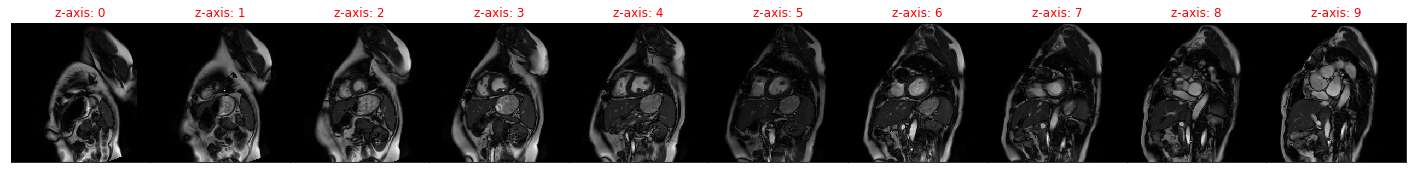

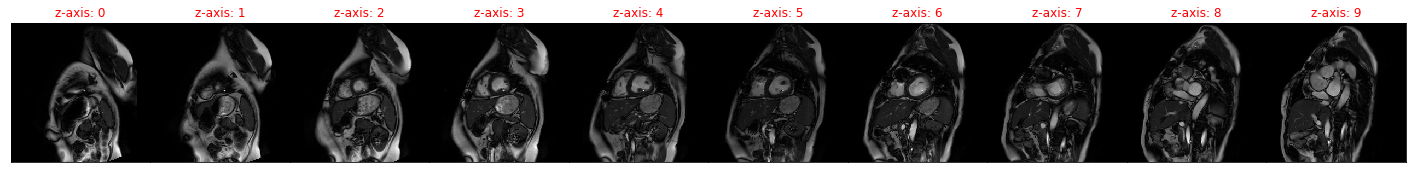

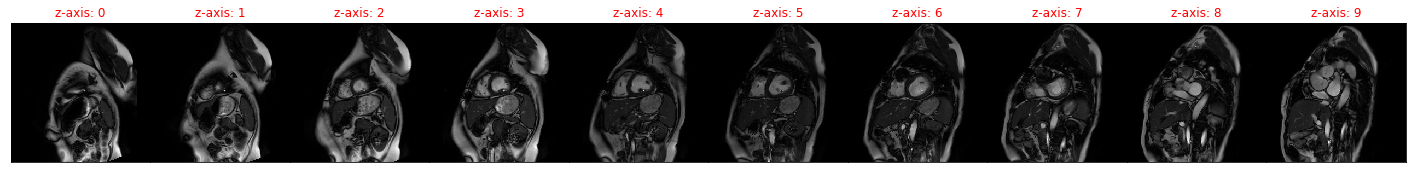

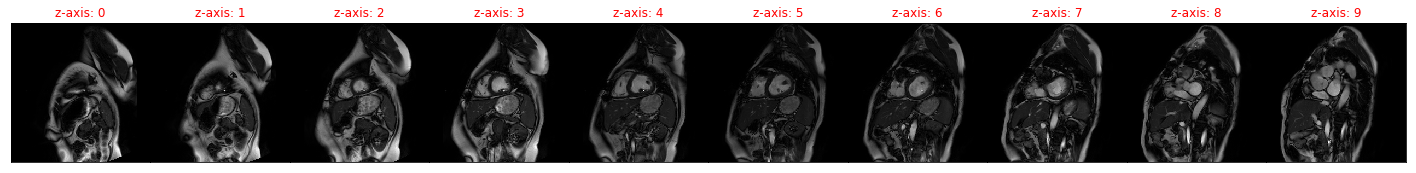

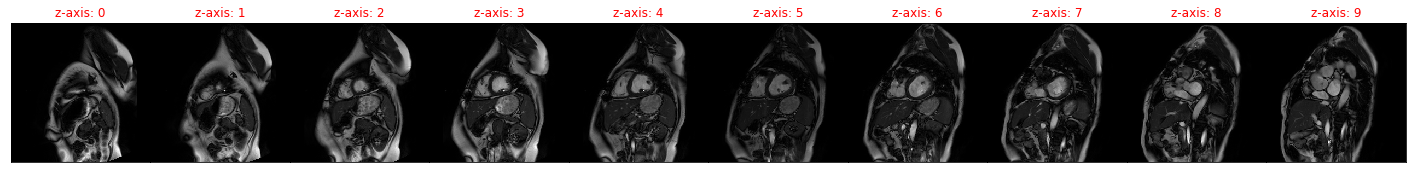

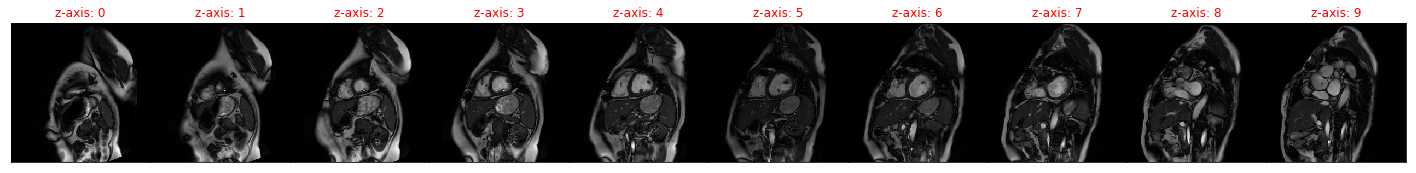

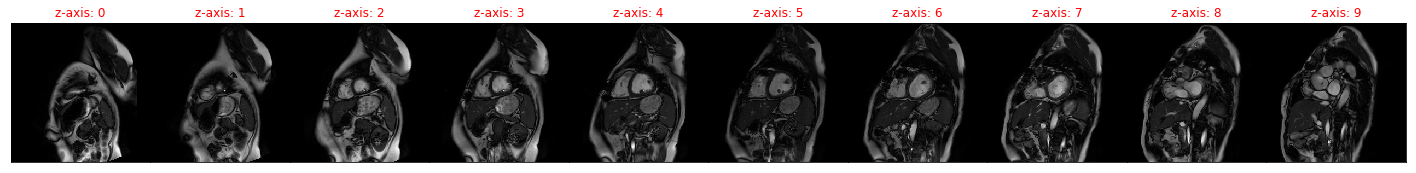

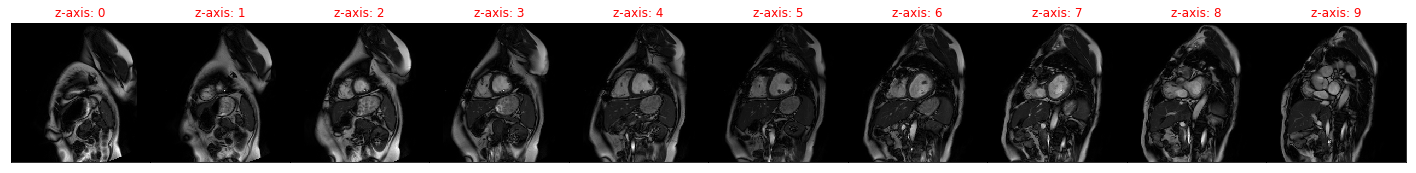

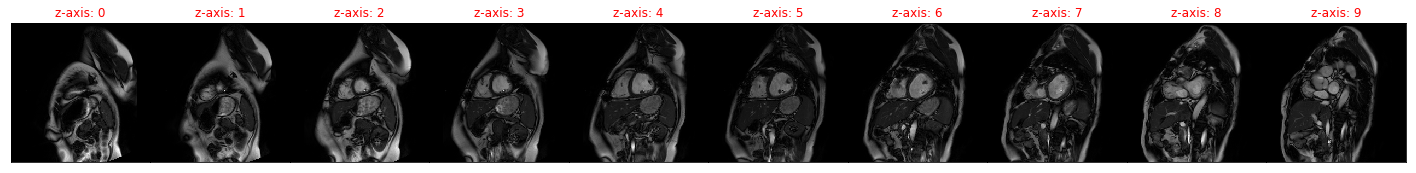

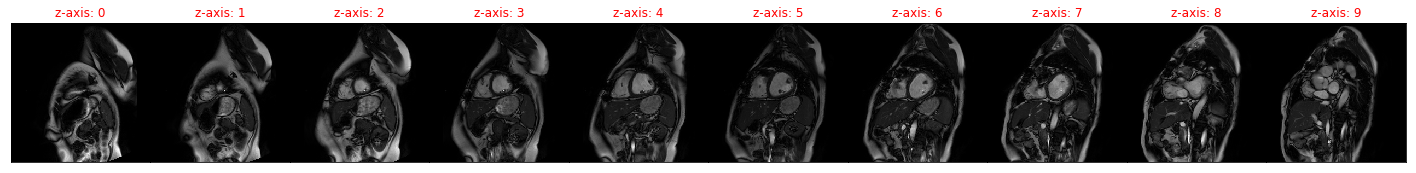

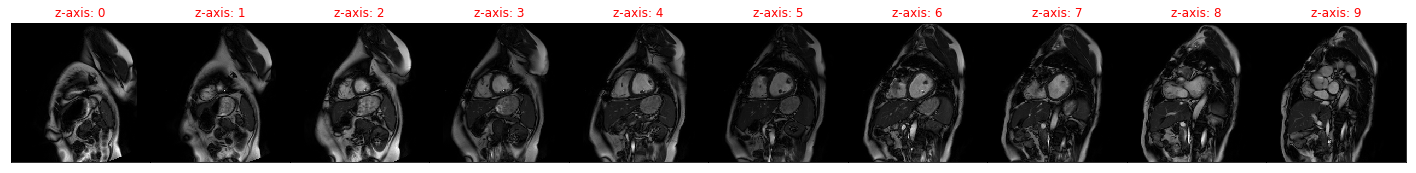

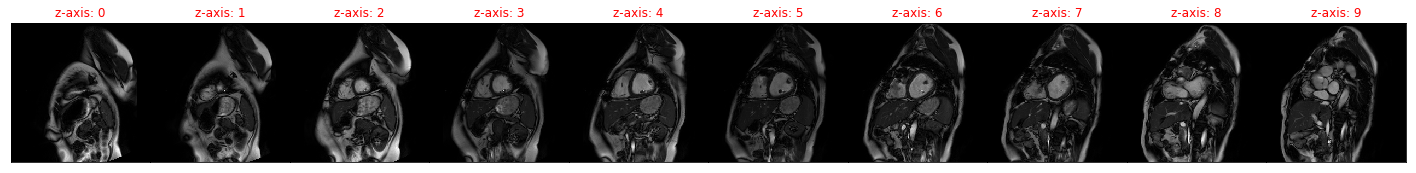

In [57]:
for vol in nda_4d:
    show_2D_or_3D(vol)